In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Excel file
excel_file = pd.read_excel('HR-Employee-Attrition.xlsx')

# Convert the data to a CSV file
excel_file.to_csv('HR-Employee-Attrition.csv', index=False)

print("Conversion from Excel to CSV completed.")


Conversion from Excel to CSV completed.


In [ ]:
# Load the dataset
data = pd.read_csv('HR-Employee-Attrition.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
# 1. Size of the dataset (number of rows and columns)
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# 2. Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# 3. Data types of each column
data_types = data.dtypes
print("\nData types of each column:")
print(data_types)


Number of rows: 1470
Number of columns: 31

Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager     

In [ ]:
# 1. Overall attrition rate in the company
overall_attrition_rate = data['Attrition'].value_counts(normalize=True)['Yes']
print(f"Overall Attrition Rate: {overall_attrition_rate:.2%}")

# 2. Attrition by gender
attrition_by_gender = data.groupby('Gender')['Attrition'].value_counts(normalize=True)
print("\nAttrition Rate by Gender:")
print(attrition_by_gender)

# 3. Attrition by marital status
attrition_by_marital_status = data.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True)
print("\nAttrition Rate by Marital Status:")
print(attrition_by_marital_status)

# 4. Relationship between age and attrition
age_attrition_relationship = data.groupby('Attrition')['Age'].mean()
print("\nAverage Age by Attrition:")
print(age_attrition_relationship)

# 5. Job roles and departments with higher attrition rates
job_role_attrition = data.groupby(['Department', 'JobRole'])['Attrition'].value_counts(normalize=True)
print("\nAttrition Rate by Department and Job Role:")
print(job_role_attrition)


Overall Attrition Rate: 16.12%

Attrition Rate by Gender:
Gender  Attrition
Female  No           0.852041
        Yes          0.147959
Male    No           0.829932
        Yes          0.170068
Name: Attrition, dtype: float64

Attrition Rate by Marital Status:
MaritalStatus  Attrition
Divorced       No           0.899083
               Yes          0.100917
Married        No           0.875186
               Yes          0.124814
Single         No           0.744681
               Yes          0.255319
Name: Attrition, dtype: float64

Average Age by Attrition:
Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

Attrition Rate by Department and Job Role:
Department              JobRole                    Attrition
Human Resources         Human Resources            No           0.769231
                                                   Yes          0.230769
                        Manager                    No           1.000000
Research & Development  Healthcare Re

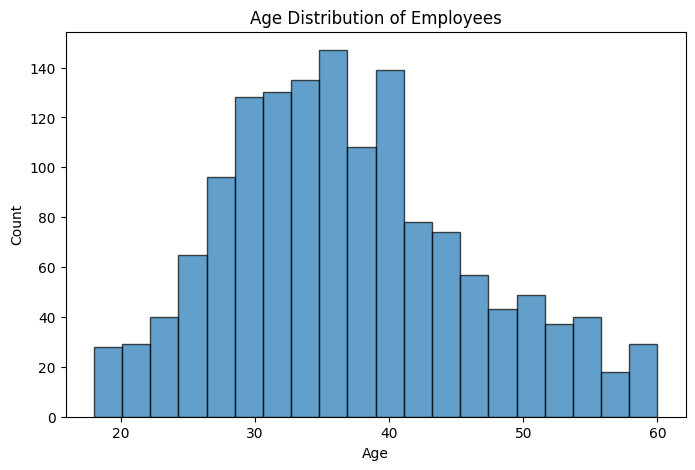


Distribution of Education Levels:
1    170
2    282
3    572
4    398
5     48
Name: Education, dtype: int64

Distribution of Gender:
Male      882
Female    588
Name: Gender, dtype: int64


In [ ]:
# 1. Age distribution of employees
plt.figure(figsize=(8, 5))
plt.hist(data['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Distribution of education levels among employees
education_distribution = data['Education'].value_counts().sort_index()
print("\nDistribution of Education Levels:")
print(education_distribution)

# 3. Distribution of gender among employees
gender_distribution = data['Gender'].value_counts()
print("\nDistribution of Gender:")
print(gender_distribution)


Average Job Satisfaction by Attrition:
Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64

Average Job Satisfaction by Job Role:
JobRole
Healthcare Representative    2.786260
Research Scientist           2.773973
Sales Executive              2.754601
Sales Representative         2.734940
Manager                      2.705882
Research Director            2.700000
Laboratory Technician        2.691120
Manufacturing Director       2.682759
Human Resources              2.557692
Name: JobSatisfaction, dtype: float64

Average Job Satisfaction by Job Involvement:
JobInvolvement
1    2.915663
2    2.680000
3    2.745392
4    2.645833
Name: JobSatisfaction, dtype: float64


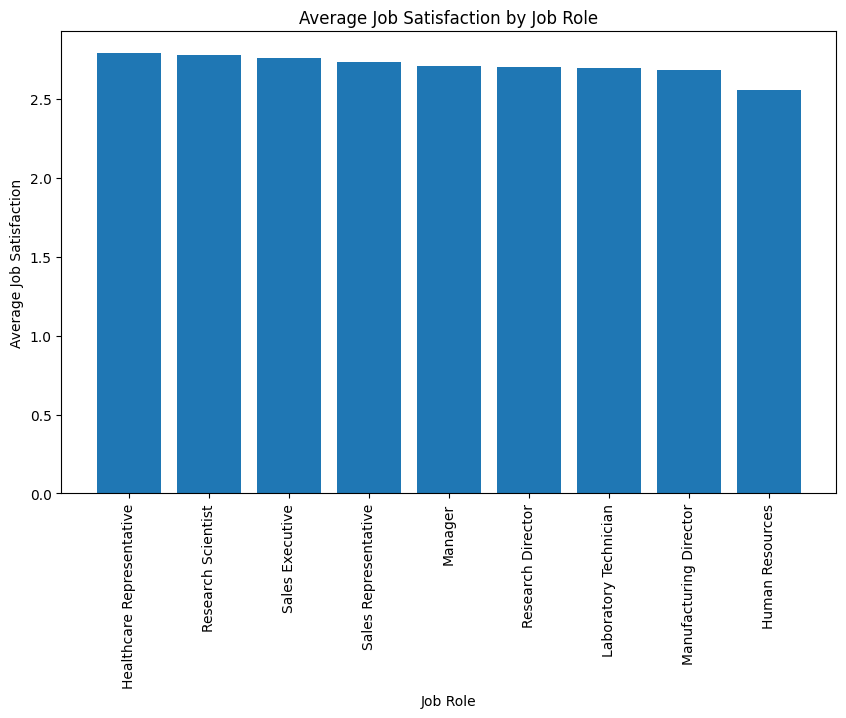

In [ ]:
# 1. Job satisfaction vs. attrition
job_satisfaction_attrition = data.groupby('Attrition')['JobSatisfaction'].mean()
print("Average Job Satisfaction by Attrition:")
print(job_satisfaction_attrition)

# 2. Job satisfaction by job role
job_satisfaction_by_role = data.groupby('JobRole')['JobSatisfaction'].mean().sort_values(ascending=False)
print("\nAverage Job Satisfaction by Job Role:")
print(job_satisfaction_by_role)

# 3. Impact of job involvement on job satisfaction
job_involvement_satisfaction = data.groupby('JobInvolvement')['JobSatisfaction'].mean()
print("\nAverage Job Satisfaction by Job Involvement:")
print(job_involvement_satisfaction)

# Plotting job satisfaction by job role
plt.figure(figsize=(10, 6))
plt.bar(job_satisfaction_by_role.index, job_satisfaction_by_role.values)
plt.title('Average Job Satisfaction by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=90)
plt.show()


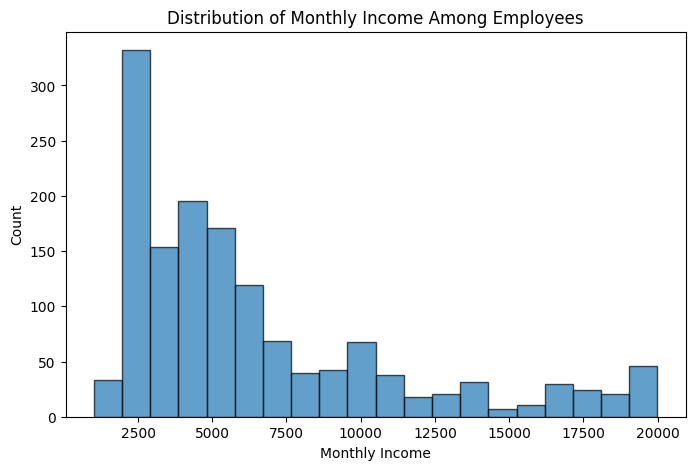


Average Monthly Income by Job Level:
JobLevel
1     2786.915285
2     5502.277154
3     9817.252294
4    15503.783019
5    19191.826087
Name: MonthlyIncome, dtype: float64

Average Monthly Income by Department:
Department
Human Resources           6654.507937
Research & Development    6281.252862
Sales                     6959.172646
Name: MonthlyIncome, dtype: float64

Average Monthly Income with Overtime:
6548.548076923077

Average Monthly Income without Overtime:
6484.926944971537


In [ ]:
# 1. Distribution of monthly income among employees
plt.figure(figsize=(8, 5))
plt.hist(data['MonthlyIncome'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Monthly Income Among Employees')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

# 2. Differences in income based on job level
income_by_job_level = data.groupby('JobLevel')['MonthlyIncome'].mean().sort_index()
print("\nAverage Monthly Income by Job Level:")
print(income_by_job_level)

# 3. Differences in income based on department
income_by_department = data.groupby('Department')['MonthlyIncome'].mean()
print("\nAverage Monthly Income by Department:")
print(income_by_department)

# 4. Impact of overtime work on monthly income
income_with_overtime = data[data['OverTime'] == 'Yes']['MonthlyIncome']
income_without_overtime = data[data['OverTime'] == 'No']['MonthlyIncome']

print("\nAverage Monthly Income with Overtime:")
print(income_with_overtime.mean())

print("\nAverage Monthly Income without Overtime:")
print(income_without_overtime.mean())


Average Tenure (Years at Company): 7.01 years

Average Tenure by Attrition:
Attrition
No     7.369019
Yes    5.130802
Name: YearsAtCompany, dtype: float64

Average Years in Current Role by Attrition:
Attrition
No     4.484185
Yes    2.902954
Name: YearsInCurrentRole, dtype: float64


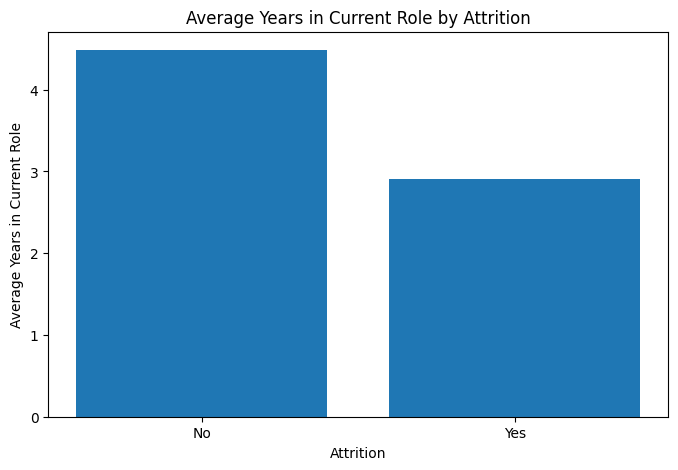

In [ ]:
# 1. Average tenure (years at the company) for employees
average_tenure = data['YearsAtCompany'].mean()
print(f"Average Tenure (Years at Company): {average_tenure:.2f} years")

# 2. Relationship between tenure and attrition
tenure_vs_attrition = data.groupby('Attrition')['YearsAtCompany'].mean()
print("\nAverage Tenure by Attrition:")
print(tenure_vs_attrition)

# 3. Relationship between years in the current role and attrition
years_in_current_role_vs_attrition = data.groupby('Attrition')['YearsInCurrentRole'].mean()
print("\nAverage Years in Current Role by Attrition:")
print(years_in_current_role_vs_attrition)

# Plotting years in the current role by attrition
plt.figure(figsize=(8, 5))
plt.bar(years_in_current_role_vs_attrition.index, years_in_current_role_vs_attrition.values)
plt.title('Average Years in Current Role by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Years in Current Role')
plt.show()


Average Work-Life Balance by Attrition:
Attrition
No     2.781022
Yes    2.658228
Name: WorkLifeBalance, dtype: float64

Average Environment Satisfaction by Attrition:
Attrition
No     2.771290
Yes    2.464135
Name: EnvironmentSatisfaction, dtype: float64

Average Distance from Home by Attrition:
Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64


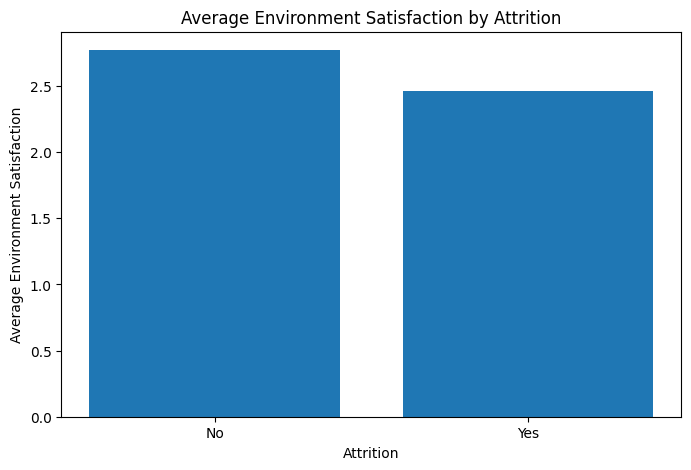

In [ ]:
# 1. Work-life balance vs. attrition
work_life_balance_attrition = data.groupby('Attrition')['WorkLifeBalance'].mean()
print("Average Work-Life Balance by Attrition:")
print(work_life_balance_attrition)

# 2. Connection between environment satisfaction rating and attrition
environment_satisfaction_attrition = data.groupby('Attrition')['EnvironmentSatisfaction'].mean()
print("\nAverage Environment Satisfaction by Attrition:")
print(environment_satisfaction_attrition)

# 3. Impact of distance from home to work on attrition
attrition_by_distance = data.groupby('Attrition')['DistanceFromHome'].mean()
print("\nAverage Distance from Home by Attrition:")
print(attrition_by_distance)

# Plotting environment satisfaction by attrition
plt.figure(figsize=(8, 5))
plt.bar(environment_satisfaction_attrition.index, environment_satisfaction_attrition.values)
plt.title('Average Environment Satisfaction by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Average Environment Satisfaction')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# 1. Attrition rates based on training times last year
attrition_by_training = data.groupby('TrainingTimesLastYear')['Attrition'].value_counts(normalize=True)
print("Attrition Rate by Training Times Last Year:")
print(attrition_by_training)

# 2. Relationship between number of companies worked at previously and attrition
attrition_by_num_companies = data.groupby('NumCompaniesWorked')['Attrition'].value_counts(normalize=True)
print("\nAttrition Rate by Number of Companies Worked At Previously:")
print(attrition_by_num_companies)


Attrition Rate by Training Times Last Year:
TrainingTimesLastYear  Attrition
0                      No           0.722222
                       Yes          0.277778
1                      No           0.873239
                       Yes          0.126761
2                      No           0.820841
                       Yes          0.179159
3                      No           0.859470
                       Yes          0.140530
4                      No           0.788618
                       Yes          0.211382
5                      No           0.882353
                       Yes          0.117647
6                      No           0.907692
                       Yes          0.092308
Name: Attrition, dtype: float64

Attrition Rate by Number of Companies Worked At Previously:
NumCompaniesWorked  Attrition
0                   No           0.883249
                    Yes          0.116751
1                   No           0.811900
                    Yes          0.188100
2 

In [ ]:
# 1. Correlation between years since the last promotion and attrition
correlation_promotion_attrition = data[['YearsSinceLastPromotion', 'Attrition']].corr().iloc[0, 0]
print(f"Correlation between Years Since Last Promotion and Attrition: {correlation_promotion_attrition:.2f}")

# 2. Impact of stock options on attrition
attrition_by_stock_options = data.groupby('StockOptionLevel')['Attrition'].value_counts(normalize=True)
print("\nAttrition Rate by Stock Option Level:")
print(attrition_by_stock_options)


Correlation between Years Since Last Promotion and Attrition: 1.00

Attrition Rate by Stock Option Level:
StockOptionLevel  Attrition
0                 No           0.755943
                  Yes          0.244057
1                 No           0.906040
                  Yes          0.093960
2                 No           0.924051
                  Yes          0.075949
3                 No           0.823529
                  Yes          0.176471
Name: Attrition, dtype: float64


<ipython-input-14-28641042a7f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_promotion_attrition = data[['YearsSinceLastPromotion', 'Attrition']].corr().iloc[0, 0]


In [ ]:
# 1. Impact of performance rating on attrition
attrition_by_performance_rating = data.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True)
print("Attrition Rate by Performance Rating:")
print(attrition_by_performance_rating)

# 2. Impact of salary hike on attrition
attrition_by_salary_hike = data.groupby('PercentSalaryHike')['Attrition'].value_counts(normalize=True)
print("\nAttrition Rate by Percent Salary Hike:")
print(attrition_by_salary_hike)


Attrition Rate by Performance Rating:
PerformanceRating  Attrition
3                  No           0.839228
                   Yes          0.160772
4                  No           0.836283
                   Yes          0.163717
Name: Attrition, dtype: float64

Attrition Rate by Percent Salary Hike:
PercentSalaryHike  Attrition
11                 No           0.804762
                   Yes          0.195238
12                 No           0.833333
                   Yes          0.166667
13                 No           0.837321
                   Yes          0.162679
14                 No           0.880597
                   Yes          0.119403
15                 No           0.821782
                   Yes          0.178218
16                 No           0.820513
                   Yes          0.179487
17                 No           0.829268
                   Yes          0.170732
18                 No           0.853933
                   Yes          0.146067
19          

In [ ]:
# 1. Influence of years with the current manager on attrition
attrition_by_years_with_manager = data.groupby('Attrition')['YearsWithCurrManager'].mean()
print("Average Years with Current Manager by Attrition:")
print(attrition_by_years_with_manager)

# 2. Relationship between relationship satisfaction and attrition
attrition_by_relationship_satisfaction = data.groupby('Attrition')['RelationshipSatisfaction'].mean()
print("\nAverage Relationship Satisfaction by Attrition:")
print(attrition_by_relationship_satisfaction)


Average Years with Current Manager by Attrition:
Attrition
No     4.367397
Yes    2.852321
Name: YearsWithCurrManager, dtype: float64

Average Relationship Satisfaction by Attrition:
Attrition
No     2.733982
Yes    2.599156
Name: RelationshipSatisfaction, dtype: float64


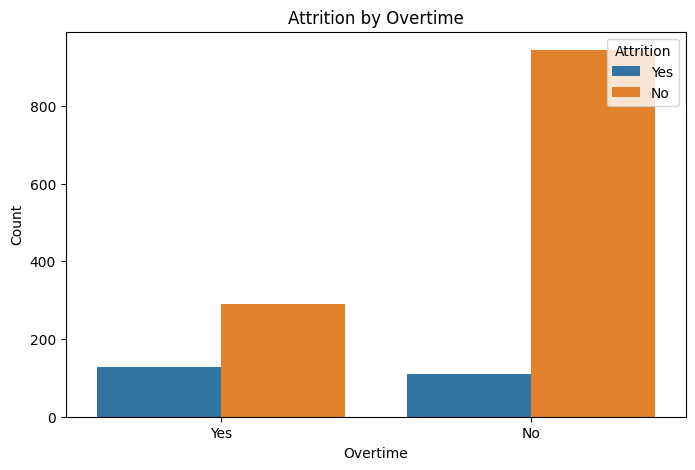

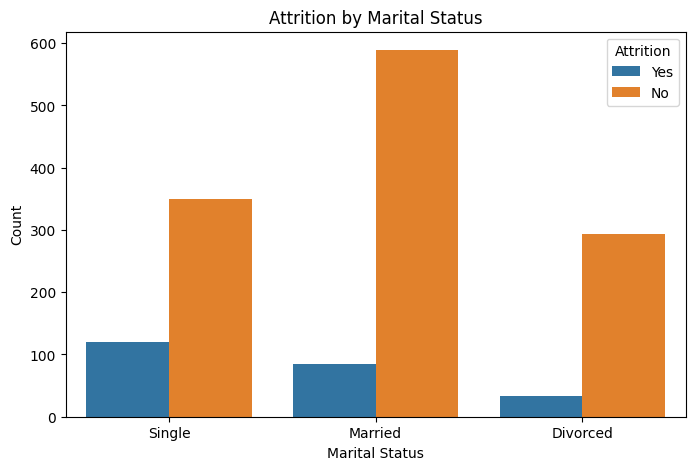

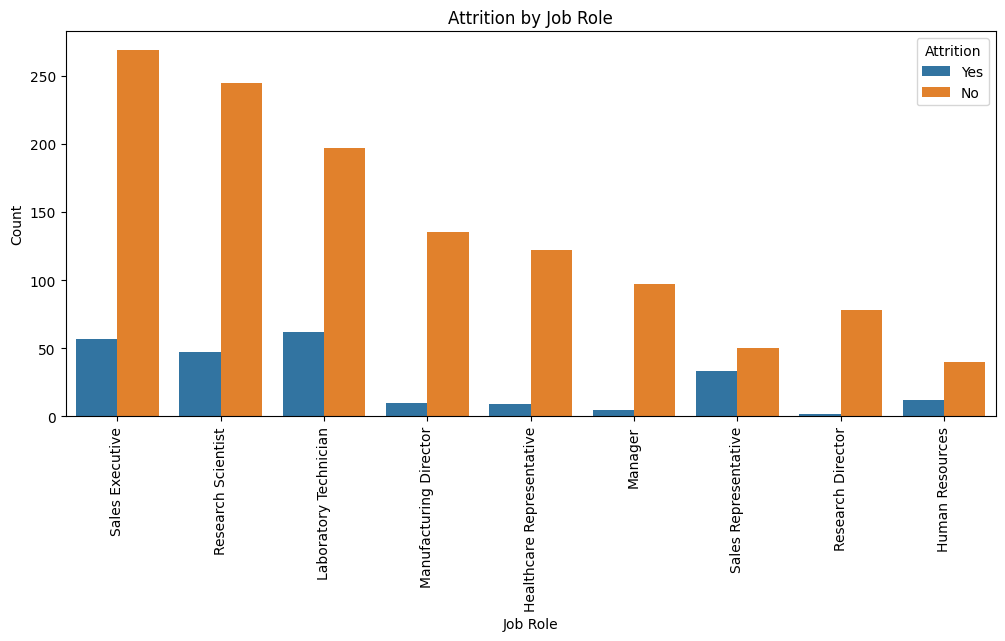

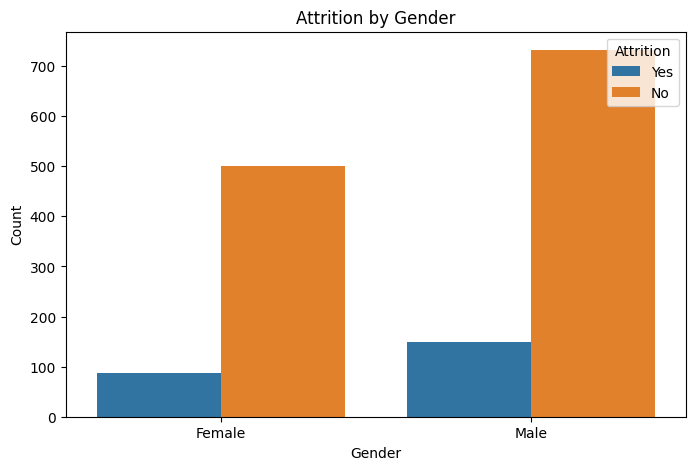

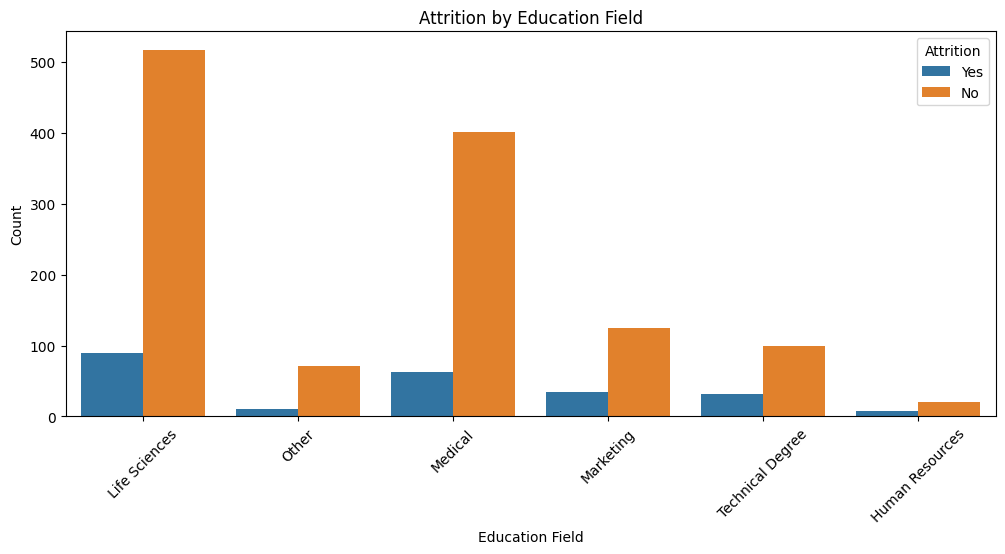

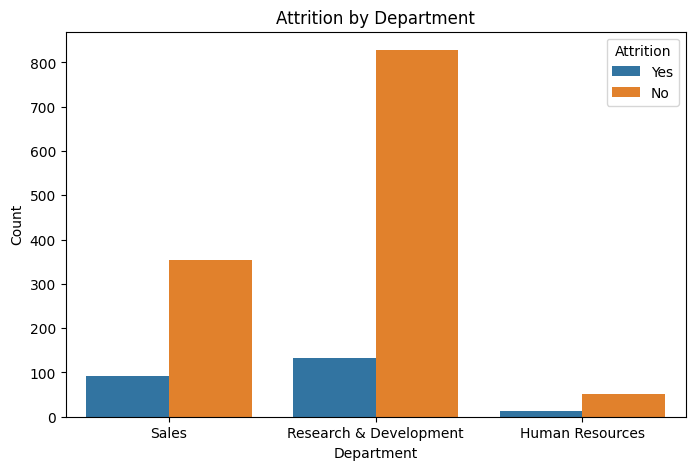

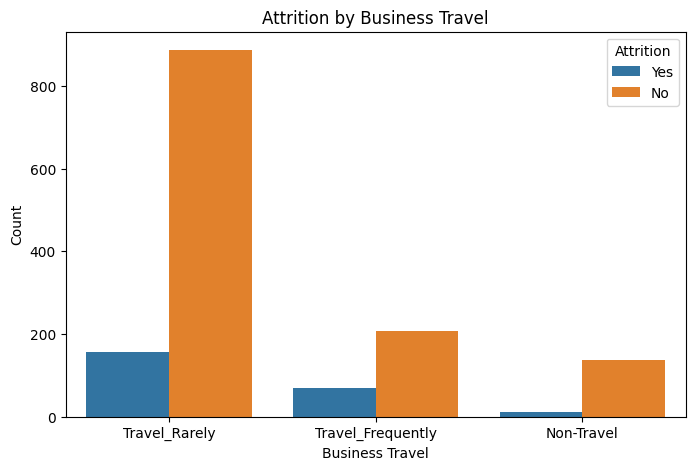

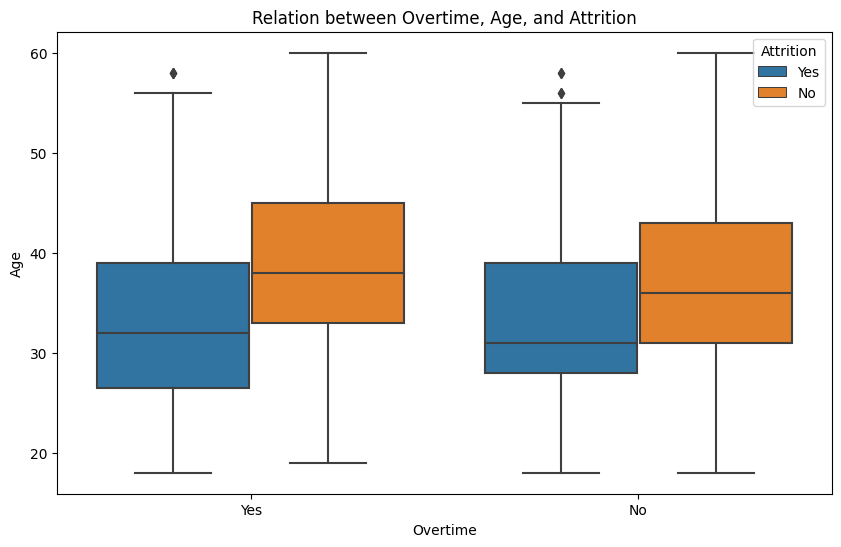

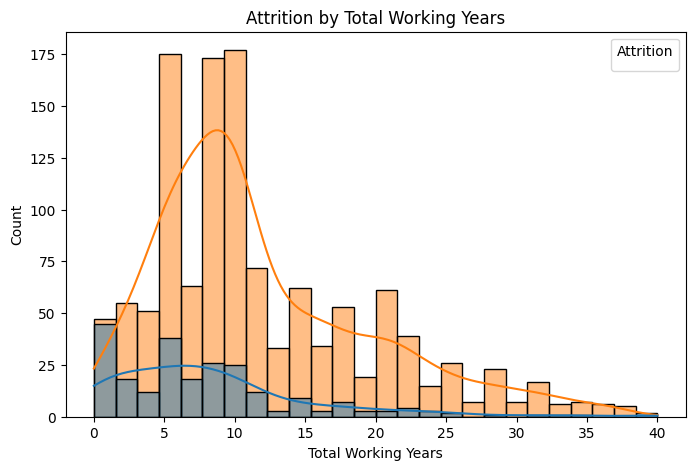

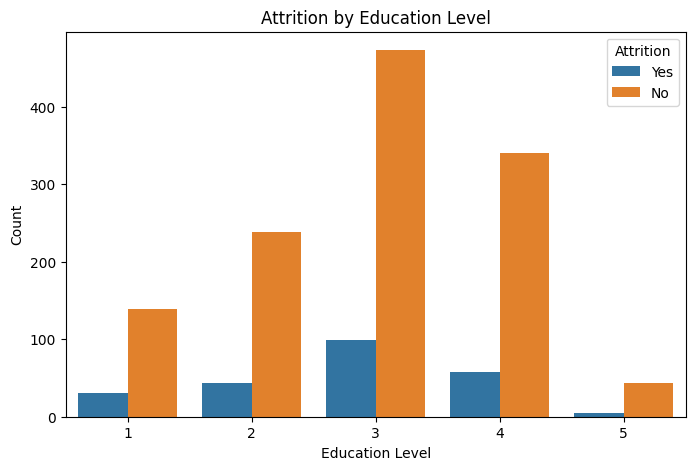

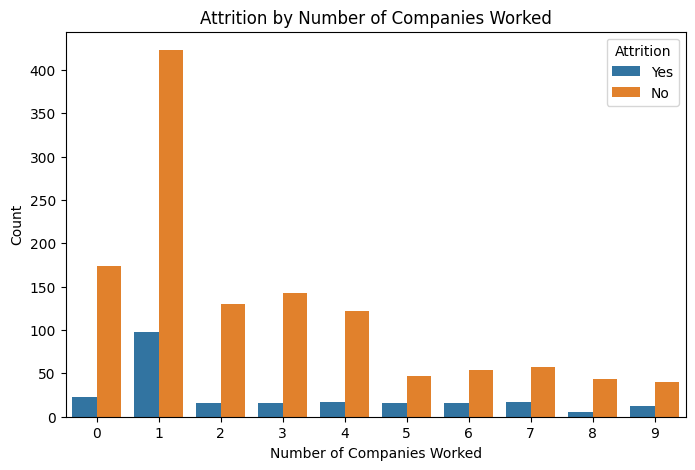

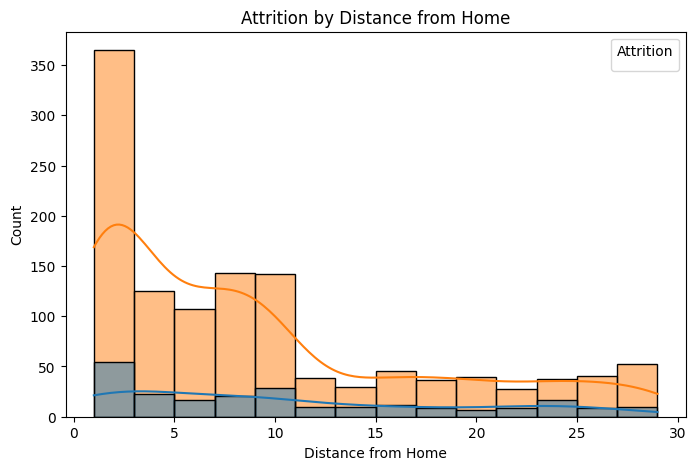

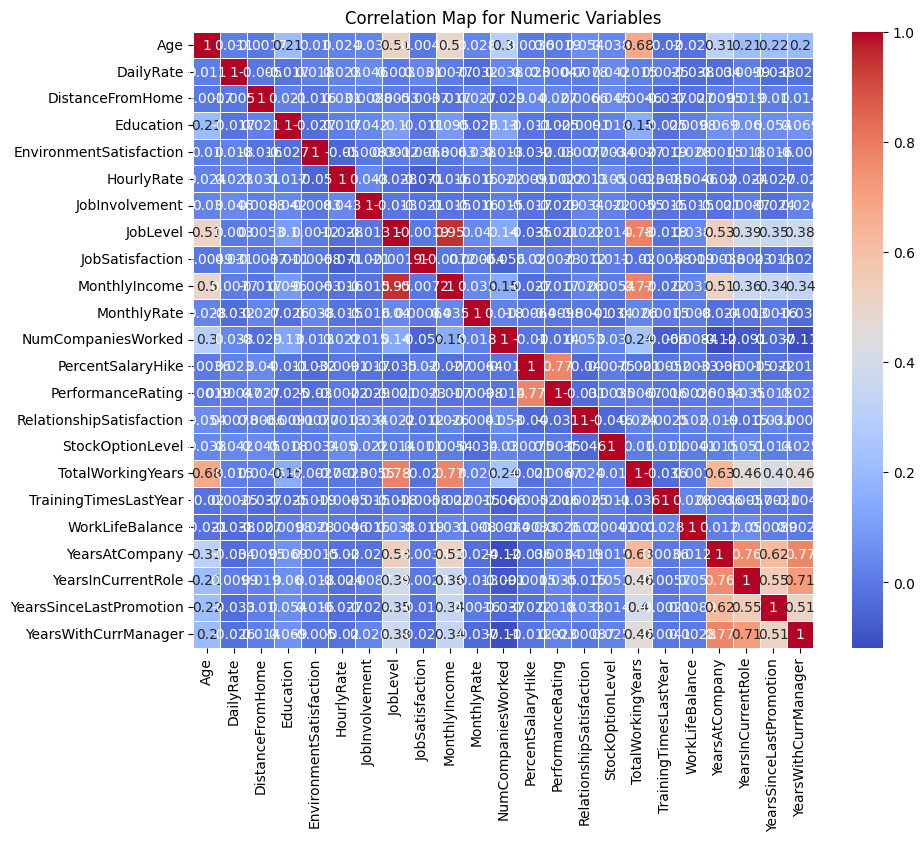

In [ ]:
# Visualization 1: Overtime
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='OverTime', hue='Attrition')
plt.title('Attrition by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 2: Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='MaritalStatus', hue='Attrition')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 3: Job Role
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 4: Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 5: Education Field
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='EducationField', hue='Attrition')
plt.title('Attrition by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 6: Department
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 7: Business Travel
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='BusinessTravel', hue='Attrition')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 8: Relation between Overtime and Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='OverTime', y='Age', hue='Attrition')
plt.title('Relation between Overtime, Age, and Attrition')
plt.xlabel('Overtime')
plt.ylabel('Age')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 9: Total Working Years
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='TotalWorkingYears', hue='Attrition', kde=True)
plt.title('Attrition by Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 10: Education Level
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Education', hue='Attrition')
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 11: Number of Companies Worked
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='NumCompaniesWorked', hue='Attrition')
plt.title('Attrition by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

# Visualization 12: Distance from Home
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='DistanceFromHome', hue='Attrition', kde=True)
plt.title('Attrition by Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()



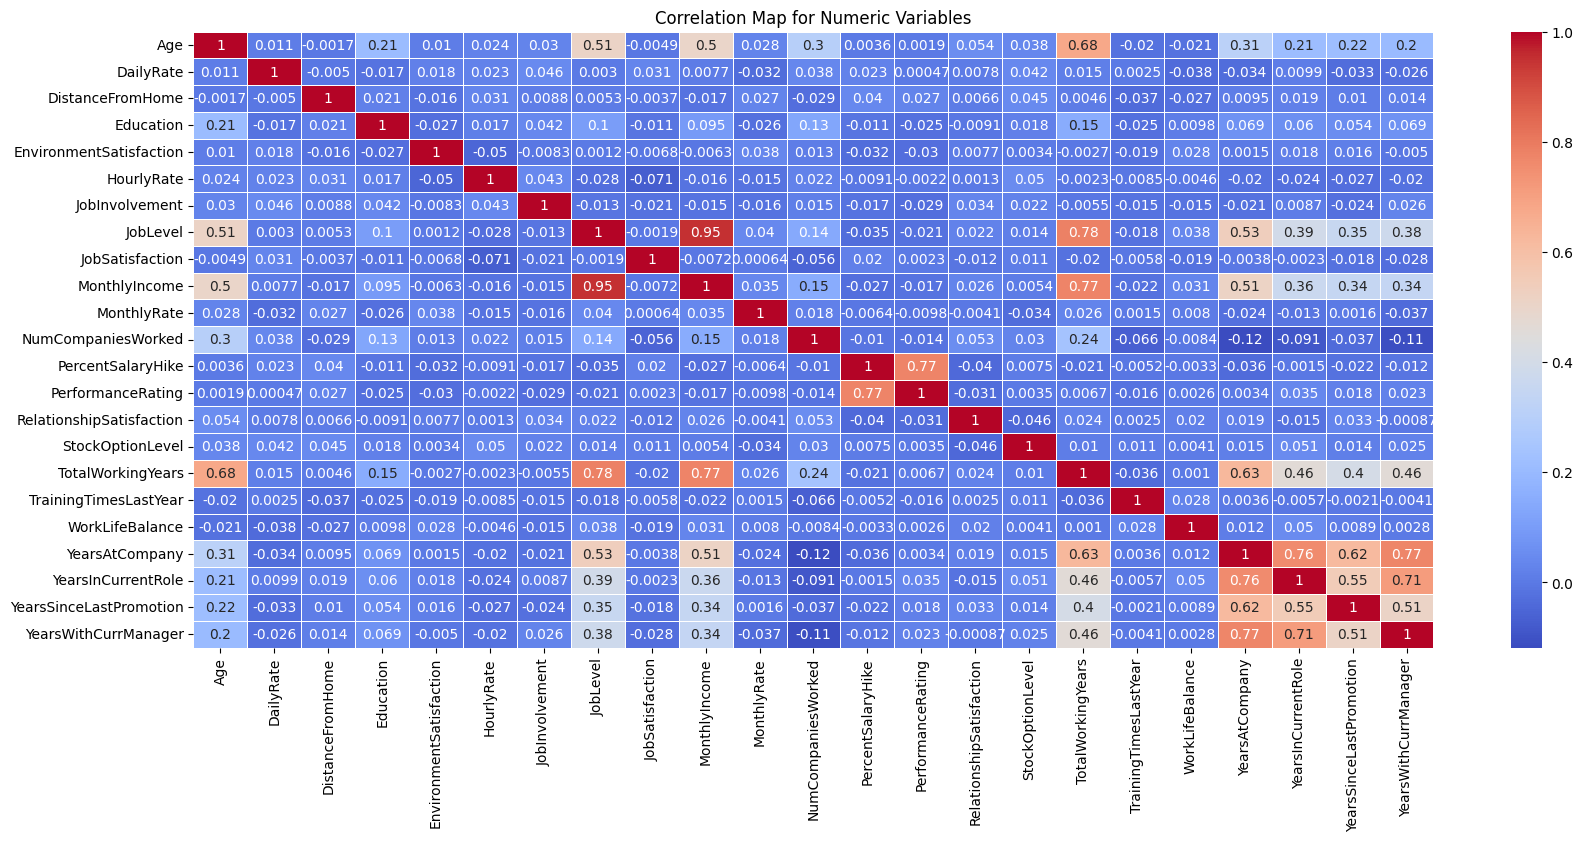

In [ ]:
# Visualization 13: Correlation Map for Numeric Variables
numeric_variables = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_variables.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map for Numeric Variables')
plt.show()

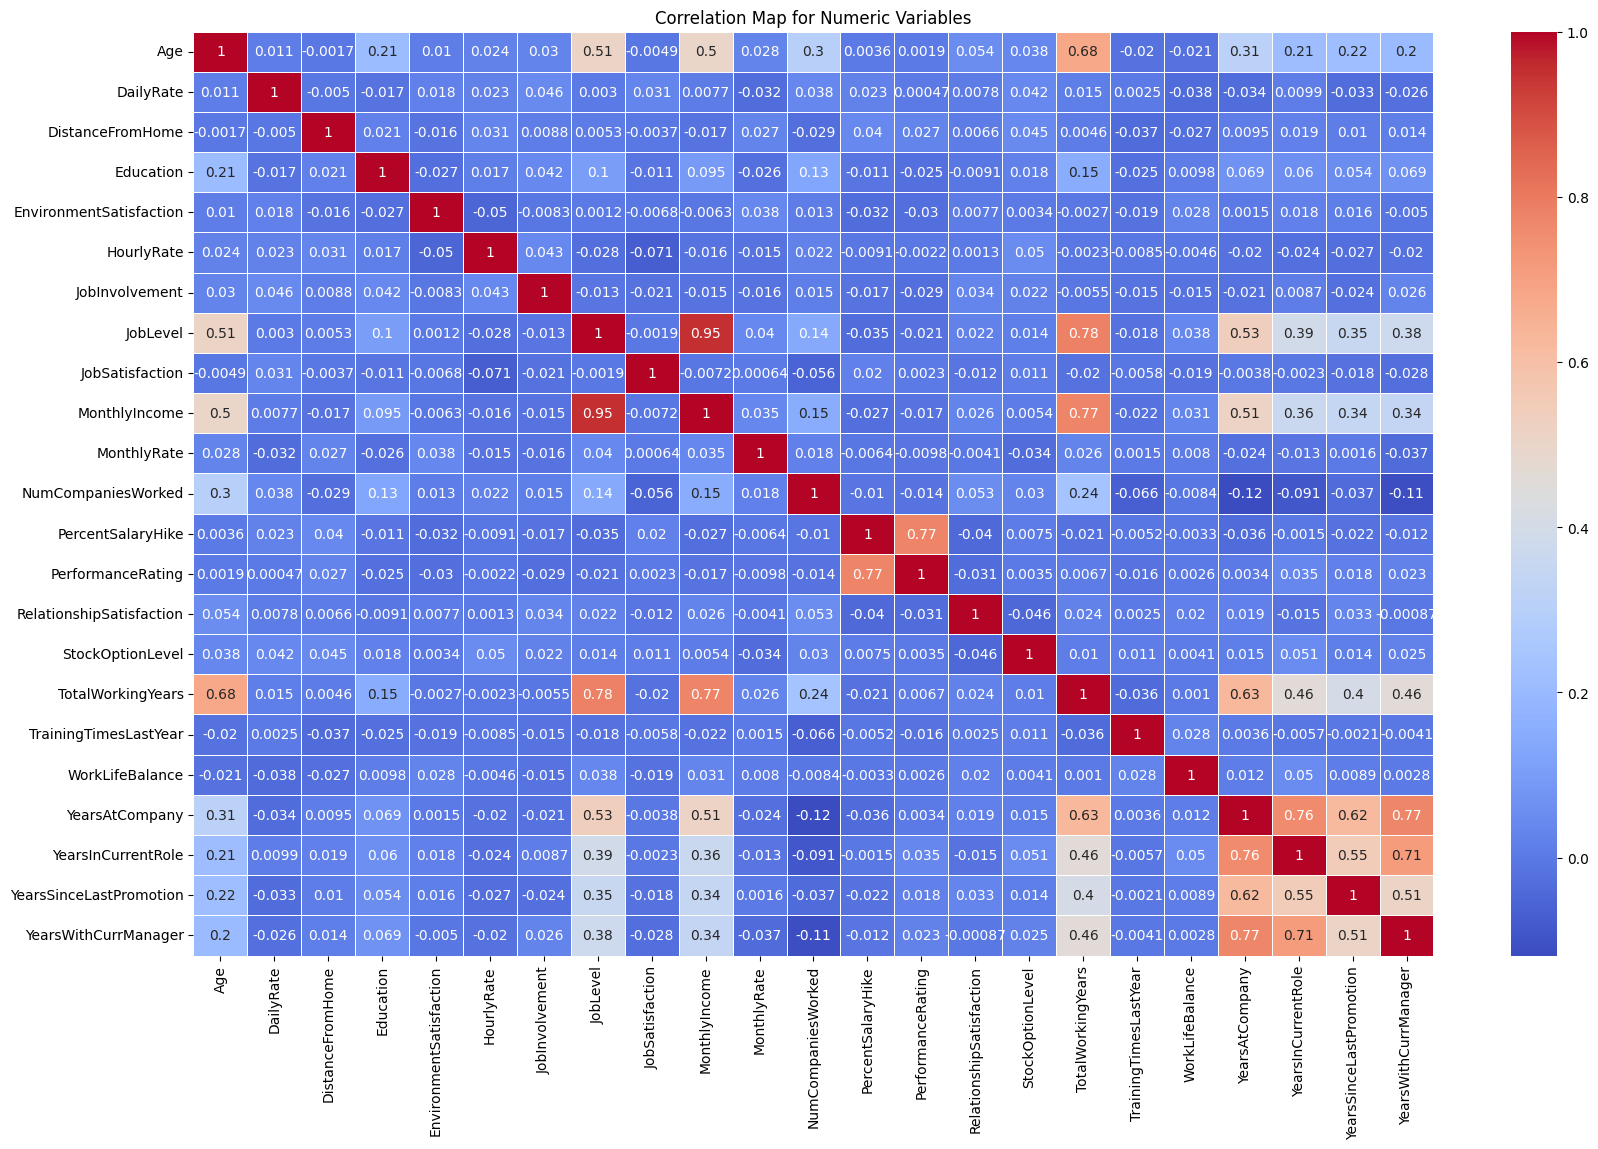

In [ ]:
# Visualization 13: Correlation Map for Numeric Variables
numeric_variables = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_variables.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map for Numeric Variables')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table for Gender and Attrition
contingency_table = pd.crosstab(data['Gender'], data['Attrition'])

# Hypothesis testing
chi2, p, _, _ = chi2_contingency(contingency_table)
alpha = 0.05

print("Question 1: Does gender have a significant impact on attrition rates?")
print(f"Chi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < alpha:
    print("Reject the null hypothesis. Gender has a significant impact on attrition rates.")
else:
    print("Fail to reject the null hypothesis. Gender does not have a significant impact on attrition rates.")


Question 1: Does gender have a significant impact on attrition rates?
Chi-squared statistic: 1.12
P-value: 0.2906
Fail to reject the null hypothesis. Gender does not have a significant impact on attrition rates.


In [ ]:
from scipy.stats import ttest_ind

# Separate data for employees who work overtime and those who do not
overtime_group = data[data['OverTime'] == 'Yes']
no_overtime_group = data[data['OverTime'] == 'No']

# Hypothesis testing
t_stat, p = ttest_ind(overtime_group['MonthlyIncome'], no_overtime_group['MonthlyIncome'])
alpha = 0.05

print("Question 2: Is there a significant difference in average monthly income between employees who work overtime and those who do not?")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p:.4f}")

if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in average monthly income.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average monthly income.")


Question 2: Is there a significant difference in average monthly income between employees who work overtime and those who do not?
T-statistic: 0.23
P-value: 0.8156
Fail to reject the null hypothesis. There is no significant difference in average monthly income.


In [ ]:
from scipy.stats import f_oneway

# Perform one-way ANOVA test for job satisfaction by job role
job_roles = data['JobRole'].unique()
grouped_data = [data[data['JobRole'] == role]['JobSatisfaction'] for role in job_roles]

# Hypothesis testing
f_stat, p = f_oneway(*grouped_data)
alpha = 0.05

print("Question 3: Does job satisfaction differ significantly among employees in different job roles?")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p:.4f}")

if p < alpha:
    print("Reject the null hypothesis. Job satisfaction varies significantly among job roles.")
else:
    print("Fail to reject the null hypothesis. Job satisfaction is the same across all job roles.")


Question 3: Does job satisfaction differ significantly among employees in different job roles?
F-statistic: 0.37
P-value: 0.9390
Fail to reject the null hypothesis. Job satisfaction is the same across all job roles.


In [ ]:
import statsmodels.api as sm

# Perform a multiple linear regression to assess causal relationship
X = data[['JobInvolvement']]  # Independent variable (job involvement)
X = sm.add_constant(X)  # Add a constant term
y = data['JobSatisfaction']  # Dependent variable (job satisfaction)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        JobSatisfaction   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6774
Date:                Wed, 20 Sep 2023   Prob (F-statistic):              0.411
Time:                        08:58:26   Log-Likelihood:                -2228.9
No. Observations:                1470   AIC:                             4462.
Df Residuals:                    1468   BIC:                             4472.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.8194      0.114     24.

In [ ]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = data.copy()

# Convert 'Attrition' to binary (if not already)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Handle missing values if necessary
# data = data.dropna()  # Drop rows with missing values

# Perform logistic regression
X = df[['YearsWithCurrManager']]  # Independent variable (years with current manager)
X = sm.add_constant(X)  # Add a constant term
y = df['Attrition']  # Dependent variable (attrition, binary)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print summary statistics
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.428135
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Sep 2023   Pseudo R-squ.:                 0.03070
Time:                        09:13:42   Log-Likelihood:                -629.36
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.719e-10
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1468      0.102    -11.195      0.000      -1.348      -0.946

In [ ]:
# Perform linear regression to assess causal relationship (work-life balance)
X = data[['DistanceFromHome']]  # Independent variable (distance from home)
X = sm.add_constant(X)  # Add a constant term
y = data['WorkLifeBalance']  # Dependent variable (work-life balance)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        WorkLifeBalance   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.036
Date:                Wed, 20 Sep 2023   Prob (F-statistic):              0.309
Time:                        09:14:20   Log-Likelihood:                -1574.0
No. Observations:                1470   AIC:                             3152.
Df Residuals:                    1468   BIC:                             3163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.7825      0.028  